In [43]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [44]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

In [46]:
# Add target and class to DataFrame
df_iris["target"] = iris.target


In [47]:
# Show 10 random samples
df_iris.sample(10)

sepal length  sepal width  petal length  petal width       class  target
114           5.8          2.8           5.1          2.4   virginica       2
62            6.0          2.2           4.0          1.0  versicolor       1
33            5.5          4.2           1.4          0.2      setosa       0
107           7.3          2.9           6.3          1.8   virginica       2
7             5.0          3.4           1.5          0.2      setosa       0
100           6.3          3.3           6.0          2.5   virginica       2
40            5.0          3.5           1.3          0.3      setosa       0
86            6.7          3.1           4.7          1.5  versicolor       1
76            6.8          2.8           4.8          1.4  versicolor       1
71            6.1          2.8           4.0          1.3  versicolor       1

In [48]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [49]:
# same process as always, identify your X's and your y's
x = df_iris.drop(['target', 'class'], axis=1)
y = df_iris['target']

In [50]:
#train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [51]:
# Scale the X's
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# apply the lda transformation
model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [53]:
# predict
train_predict = model.predict(X_train_scaled)
(train_predict == y_train).sum()/len(y_train)

0.9809523809523809

In [54]:
# predict
test_predict = model.predict(X_test_scaled)
(test_predict == y_test).sum()/len(y_test)

0.9777777777777777

In [55]:
x_lda = model.transform(X_train_scaled)
x_lda[:3]

array([[-0.93534728,  2.56340654],
       [-4.9854655 ,  0.12984179],
       [-6.71818728, -2.28054655]])

In [57]:
# select 2 principal components

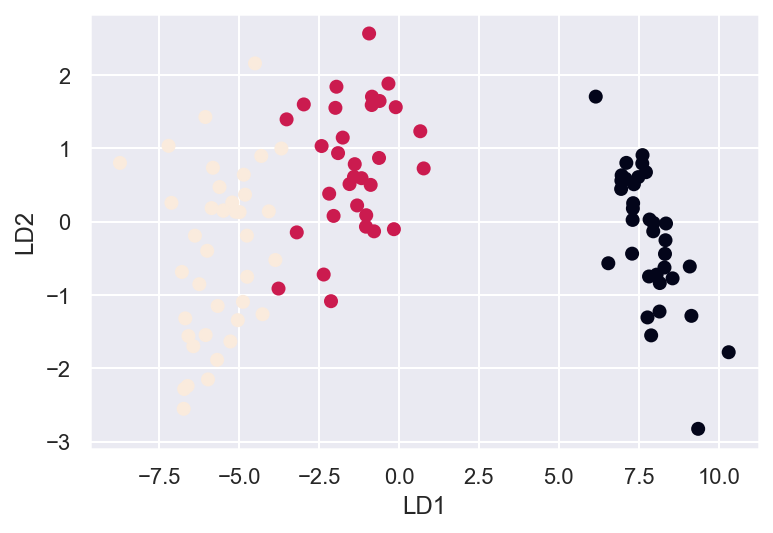

In [58]:
# take a look at the new axes for the data and plot them
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y_train)

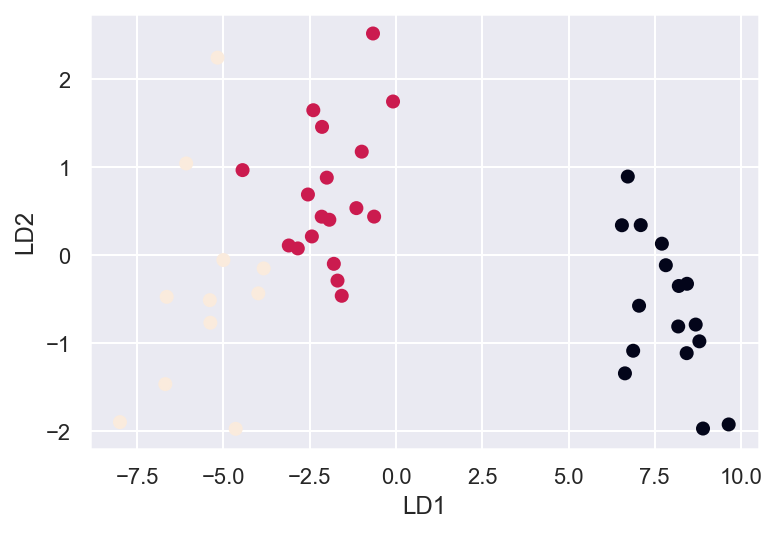

In [63]:
X_test_LDA = model.transform(X_test_scaled)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.scatter(X_test_LDA[:, 0], X_test_LDA[:, 1], c=y_test)

In [64]:
# what about the variability?
sum(model.explained_variance_ratio_)

1.0

In [65]:
# Run a Random Forest Classifier with the transformed data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_lda, y_train)

y_pred = clf.predict(X_test_LDA)
y_pred.shape


(45,)

In [61]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?